<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = pd.DataFrame(columns={"No.","Language","Created By","Average Annual Salary","Learning Difficulty"})

for row in soup.find_all('tr'):
    body = row.find_all('td')
    lang = body[1].getText ()
    sal = body[3].getText ()
    print(("{}--->{}").format(lang, sal))
    table = table.append({"Language": lang, "Average Annual Salary": sal}, ignore_index=True)
    table.head()

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here
table_rows=soup.find_all('tr')
l=[]
for tr in table_rows:
    td=tr.find_all('td')
    row=[tr.text for tr in td]
    l.append(row)
df=pd.DataFrame(l,columns=["No.","Language","Created By","Average Annual Salary","Learning Difficulty"])
df.drop(["No.","Created By","Learning Difficulty"], axis=1, inplace=True)
df.drop(df.index[0], inplace=True)
df['Average Annual Salary'].replace('[\$,]', '', regex=True, inplace=True)
df['Average Annual Salary'] = df['Average Annual Salary'].astype(int)
df.sort_values('Average Annual Salary', ascending=False, inplace=True)
df = df.set_index('Language')
df

print(df.dtypes)
df

Average Annual Salary    int64
dtype: object


,Average Annual Salary
Language,
Swift,130801
Python,114383
C++,113865
Javascript,110981
Java,101013
Go,94082
R,92037
C#,88726
SQL,84793


In [7]:
df.to_csv('popular-languages.csv')
df

,Average Annual Salary
Language,
Swift,130801
Python,114383
C++,113865
Javascript,110981
Java,101013
Go,94082
R,92037
C#,88726
SQL,84793


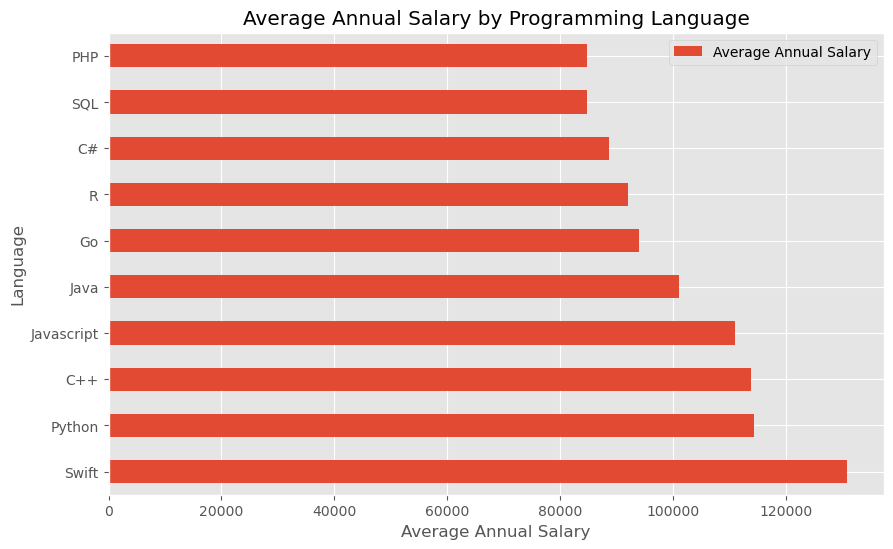

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')
#create a horizontal bar chart
df.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Average Annual Salary') # add to x-label to the plot
plt.ylabel('Language') # add y-label to the plot
plt.title('Average Annual Salary by Programming Language') # add title to the plot

plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
